https://docs.scipy.org/doc/scipy/tutorial/fft.html

https://www.codespeedy.com/plot-negative-of-an-image-in-python/
https://ensip.gitlab.io/pages-info/ressources/transverse/tuto_images.html

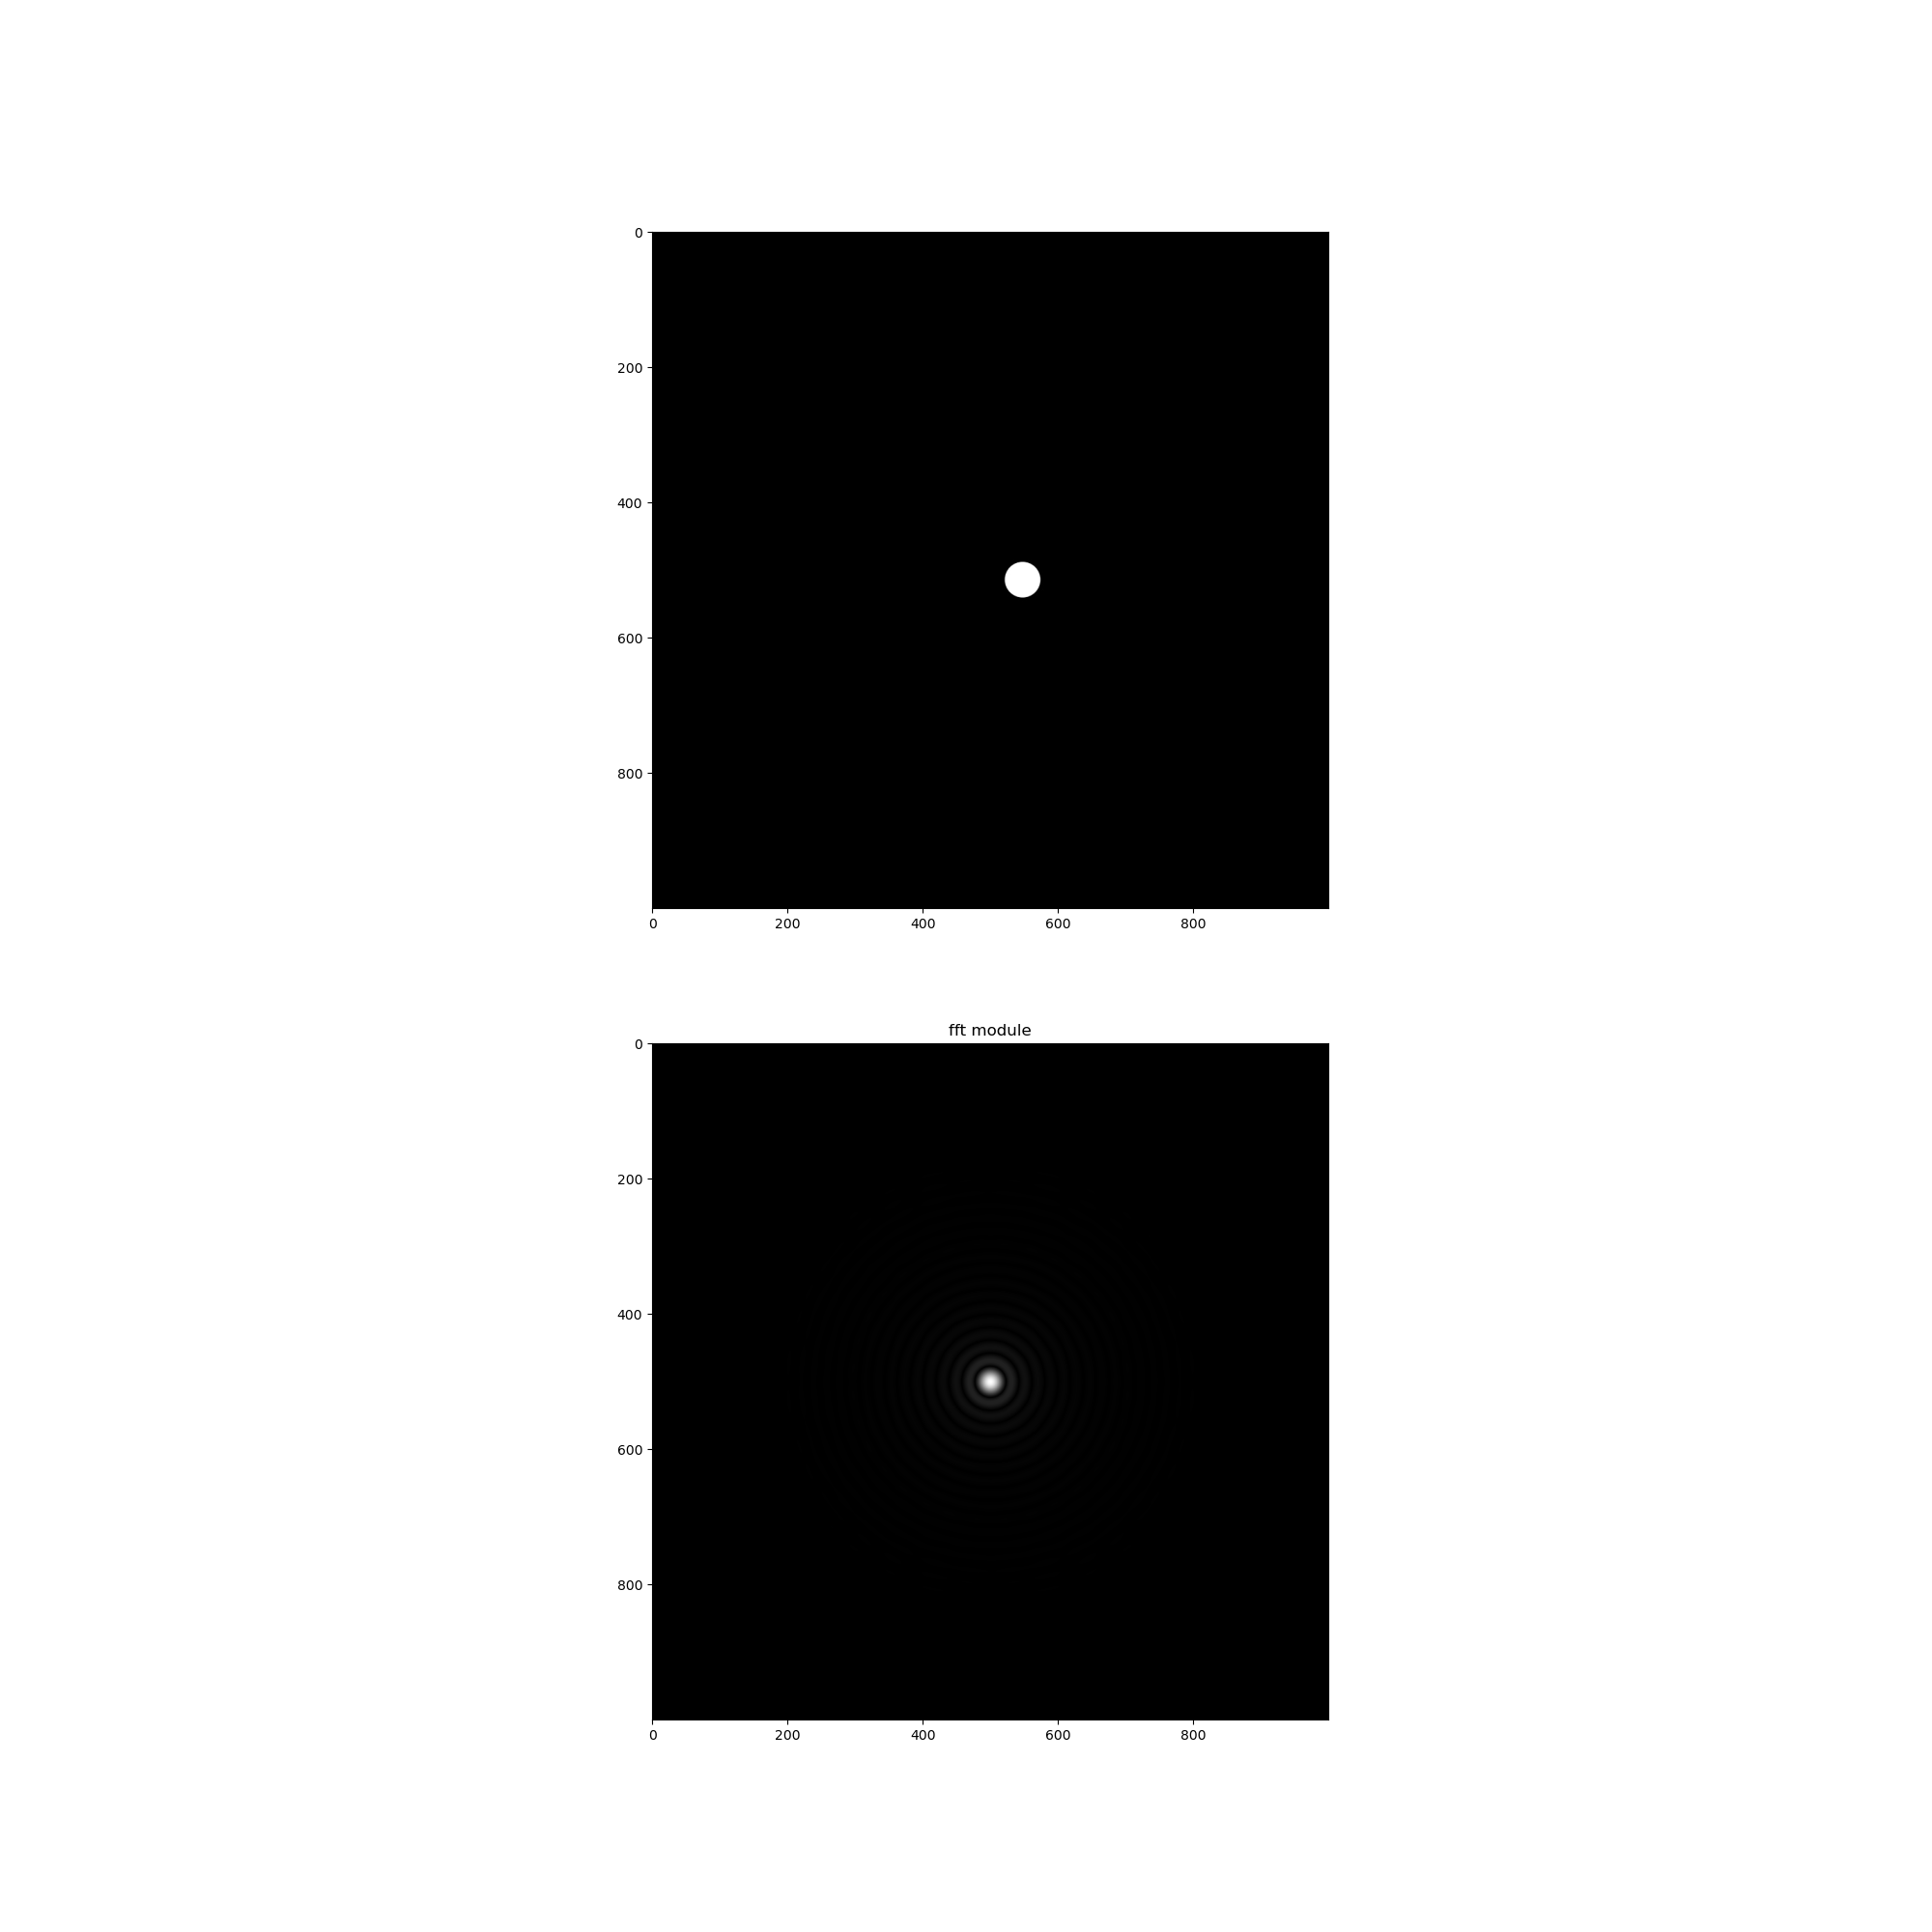

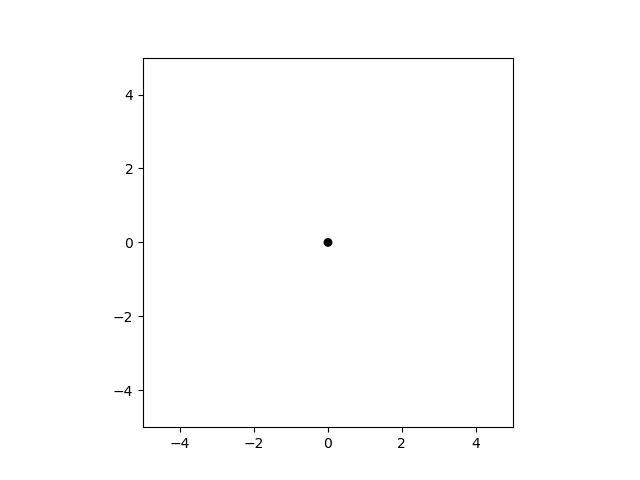

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import scipy
import ipywidgets as widgets
%matplotlib widget

def normalog(mat):
     mat1 = norma(mat)
     mat1 = np.log(1 + mat1)
     mat1 *= 255. / mat1.max()
     return mat1

def norma(mat):
     mat1 = mat.real
     mat1 -= mat1.min()
     mat1 *= 255. / mat1.max()
     return mat1

circle = plt.Circle((0, 0), 0.1, color='black')
fig, ax = plt.subplots()
plt.xlim(-5,5)
plt.ylim(-5,5)
ax.set_aspect(1)
ax.add_artist(circle)

image_filename = "1_cercle.jpg"

plt.savefig("1_cercle.jpg",dpi=600)
image = plt.imread(image_filename)
image = image[:, :, :3].mean(axis=2)  # Convert to grayscale

y=np.shape(image)
negatif=np.zeros(y)
negatif=255-image

centreX=y[0]/2
centreY=y[1]/2

decalage = 500
negatif=negatif[int(centreX)-decalage:int(centreX)+decalage,int(centreY)-decalage:int(centreY)+decalage]
negatif_fft = np.fft.fft2(negatif)

fft_abs = abs(negatif_fft)
fft_abs = np.fft.fftshift(fft_abs)

fig = plt.figure(figsize=(20, 20))

ax1 = fig.add_subplot(2, 1, 1)
ax1.imshow(negatif, cmap = mpl.cm.gray)
ax1.set_aspect(1)

ax2 = fig.add_subplot(2, 1, 2)
plt.title('fft module')
ax2.imshow(norma(fft_abs), cmap = mpl.cm.gray)
ax2.set_aspect(1)

plt.show()

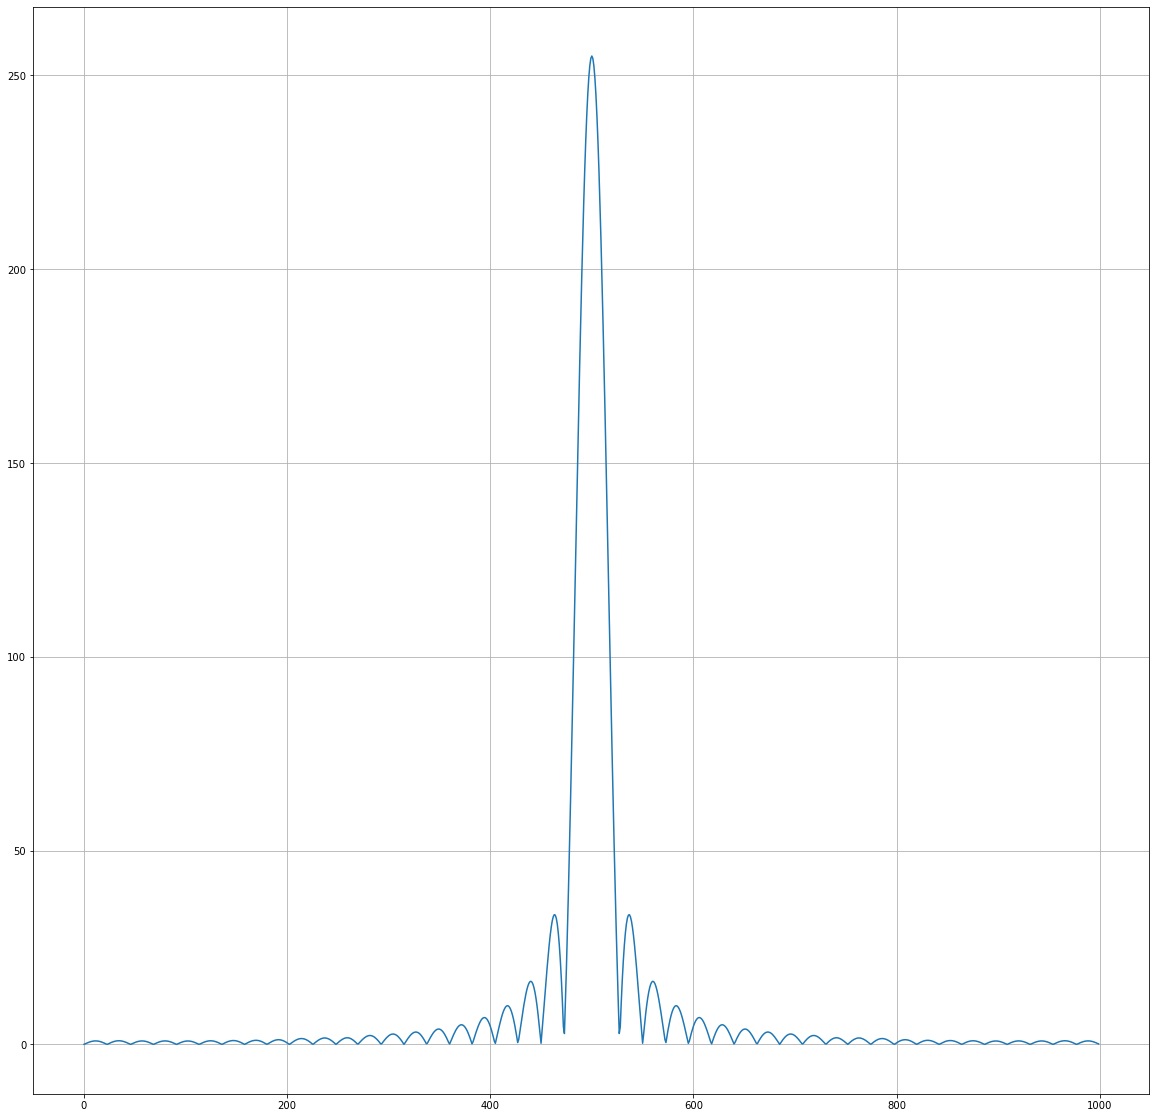

In [10]:
fft_abs.shape
fig = plt.figure(figsize=(20, 20))
plt.plot(fft_abs[500,:])
plt.grid()